In [2]:
import pandas as pd

In [3]:
moderna = pd.read_csv("../data/USA/usa_moderna.csv")
moderna.drop(columns = "Unnamed: 0", inplace = True)
moderna

,Text
0,Truth --- #Malone \n\nBaillie Gifford &amp; Co...
1,@pcrritesgood @6eustacia @JesseKellyDC I lost ...
2,Need your first shot? A booster? Come to Rub...
3,@NoorAli60402024 @kit10219512 @blane1122 We ha...
4,@JoyceWhiteVance Weekday does immunize mean he...
...,...
56332,@ABC Here is a short video about the Moderna C...
56333,@ABC @ABCNewsLive Here is a short video about ...
56334,@CNN Here is a short video about the Moderna C...
56335,@CNN Here is a short video about the Moderna C...


In [4]:
pfizer = pd.read_csv("../data/USA/usa_pfizer.csv")
pfizer.drop(columns = "Unnamed: 0", inplace = True)
pfizer

,Text
0,@sluchetti @massimogara @borghi_claudio Evito ...
1,I wonder how many in our leadership in the US ...
2,@MeetDogBlack1 @joncoopertweets What's in the ...
3,@Writingwithabi1 @TPaine1988 @CookDayNight @th...
4,Pfizer made an unreal $36.8 BILLION from its C...
...,...
96061,Why would his financial advisors make such spe...
96062,@PressSec @realDonaldTrump He can only take cr...
96063,@NickiZvik @GavinNewsom I think Pfizer and Mod...
96064,@ABTudorQueen According to the CDC there are ...


In [24]:
janssen = pd.read_csv("../data/USA/usa_janssen.csv")
janssen.drop(columns = "Unnamed: 0", inplace = True)
janssen

,Text
0,One of my favourite things to do in this job i...
1,Happy to support a local small business with m...
2,@AlexCVassar @CAStateLibrary What a dream job!
3,@JuiceboxCA brand-centricity is the antithesis...
4,Woah. https://t.co/9RQf0d9aw7
...,...
5089,Good milestone for Janssen’s vaccine candidate...
5090,"Research teams at University of Kentucky, Bapt..."
5091,📣🆕#️⃣SesiónMensual Diciembre\n@coleurolgto 🇲🇽 ...
5092,@PattyArquette @donwinslow Correct! I am a vol...


In [6]:
pfizer_text_list = pfizer['Text'].tolist()

pfizer_text_list

["@sluchetti @massimogara @borghi_claudio Evito di scrivere sull'argomento, tanto per come sta andando tra FDA/risk assessment di Pfizer, studi in pre-print, etc, penso che nei prossimi mesi i soggetti in questione dovranno dare loro stessi molte spiegazioni.",
 'I wonder how many in our leadership in the US haf Pfizer Stock?\n#TermLimits https://t.co/bHvKu93lMd',
 "@MeetDogBlack1 @joncoopertweets What's in the COVID vaccines used in the US *cannot* infect anyone with COVID because THERE IS NO COVID VIRUS IN IT! \nNot live nor killed virus!\n\nModerna, Pfizer, J&amp;J! \nWhat IS in the vaccine is the ability to have a vaccinated person's immune system RECOGNIZE its spike protein!",
 "@Writingwithabi1 @TPaine1988 @CookDayNight @thehill And you don't understand that they give the Pfizer vaccine full fda approval  6 months ago. Or maybe you forgot \n\nEither way...pathetic deflection",
 'Pfizer made an unreal $36.8 BILLION from its COVID-19 vaccine in 2021, the top-selling pharmaceutical 

In [7]:
import numpy as np
import re

In [18]:
stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from",  "vaccine", "covid", "pfizer", "moderna", "janssen", "vaccines","vaccinated","vaccination", "day", "night", "amp", "pm", "am", "will"]

def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    return temp

In [19]:
pfizer_cleaned_tweets = [clean_tweet(tw) for tw in pfizer_text_list]
pfizer_cleaned_tweets

<ipython-input-18-8ad76bbae69d>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


['evito di scrivere sullargomento tanto per come sta andando tra fda risk assessment di studi pre print etc penso che nei prossimi mesi i soggetti questione dovranno dare loro stessi molte spiegazioni',
 'i wonder how many our leadership us haf stock',
 'whats used us cannot infect anyone with because there is no virus it not live nor killed virus j j what is is ability have persons immune system recognize its spike protein',
 'you dont understand that they give full fda approval 6 months ago or maybe you forgot either way pathetic deflection',
 'made unreal 36 8 billion its 19 2021 top selling pharmaceutical product ever single year via',
 'i heard was supposed drop bad news today but i ve been busy all haven t heard',
 'not sure where you live but no treatments are available where i live totally out stock monoclonal drug even high risk ppl b natural immunity not proven yet new evidence breakthrough upon breakthrough serious possibility immune damage many',
 'that brings us today ther

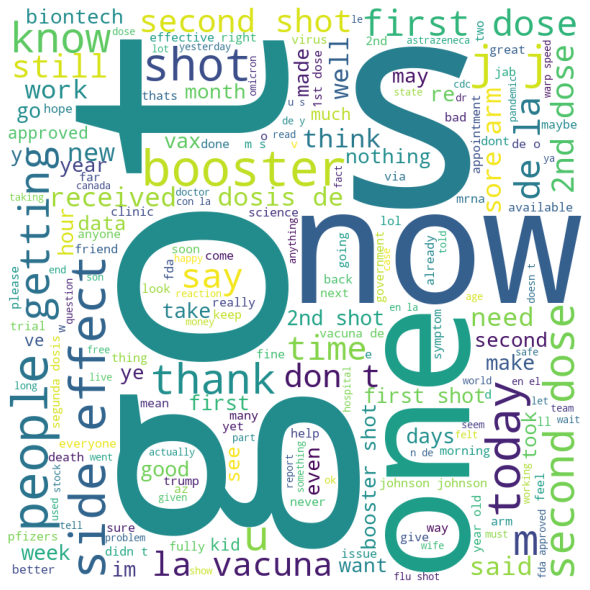

In [20]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# iterate through list
for tweet_text in pfizer_cleaned_tweets:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "
    
# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [21]:
moderna_text_list = moderna['Text'].tolist()

moderna_text_list

['Truth --- #Malone \n\nBaillie Gifford &amp; Co. owns both; in fact is Top shareholder  of each entity @joerogan \n\nBaillie Gifford owns 44.7 million shares of Moderna, \nhttps://t.co/7Pe4MsR3Bj\n\nBaillie Gifford owns 21.4 million shares of Spotify\nhttps://t.co/ZoCSwSLGGN https://t.co/uVQ5eaB9Vq',
 '@pcrritesgood @6eustacia @JesseKellyDC I lost my mother to Moderna',
 'Need your first shot?  A booster?  Come to Ruby Tucker (322 Tancil Court) Tomorrow, February 11th from 5:30 to 7:00pm **Walk-ins Welcome** or register here:\nPfizer 12+ https://t.co/IgMng58F8u\nModerna https://t.co/VWe3mBTqKV\nPfizer 5-11 y/o https://t.co/AUVQf8x1el https://t.co/WbEKd5SS4T',
 '@NoorAli60402024 @kit10219512 @blane1122 We have Pfizer &amp; Moderna that are FDA authorized &amp; approved. I don’t know much about J &amp; J or AstraZeneca. I took the Pfizer. My dear friend has been in the hospital/ICU for over 30 days with Covid. He is #unvaccinated. Stay safe. https://t.co/zEnuZ5dURA',
 "@JoyceWhiteVance 

In [22]:
moderna_cleaned_tweets = [clean_tweet(tw) for tw in moderna_text_list]
moderna_cleaned_tweets

<ipython-input-18-8ad76bbae69d>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


['truth baillie gifford co owns both fact is top shareholder each entity baillie gifford owns 44 7 million shares baillie gifford owns 21 4 million shares spotify',
 'i lost my mother',
 'need your first shot booster come ruby tucker 322 tancil court tomorrow february 11th 5 30 7 00pm walk ins welcome or register here 12 5 11 y o',
 'we have that are fda authorized approved i don t know much about j j or astrazeneca i took my dear friend has been hospital icu over 30 days with he is stay safe',
 'weekday does immunize mean here im guessing your not talking or',
 'mrna i dont know why people even talk about or anymore vaxart is about with suppository thats going be end game game over vaxart wins',
 'kansas woman s death is being attributed s 19 according her obituary death records',
 'nos lleg esto sucedi ayer asi los resultados para los 4 en casa n con las 3 inyecciones eso s todo muy leve gad hasta el momento mi mam es la m s delicada dice que siente una gripe muy fuerte ella se vacun

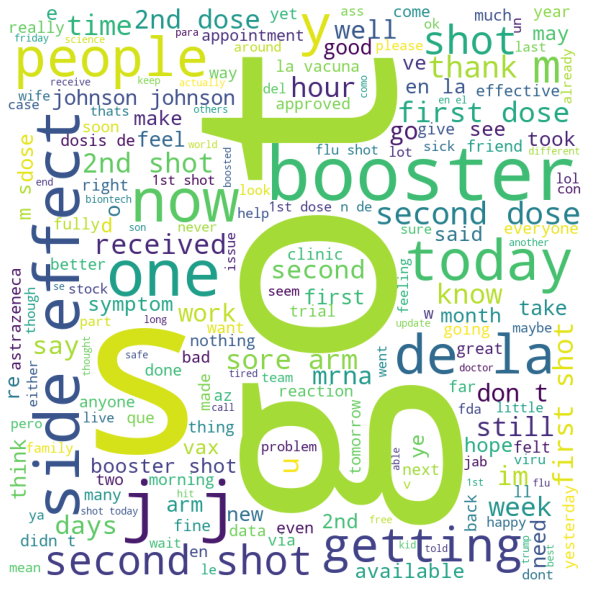

In [23]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# iterate through list
for tweet_text in moderna_cleaned_tweets:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "
    
# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()